In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def mean(*args):
    return sum(args)/len(args)

def polyfit(x, y, n=1):
    if x.size != y.size:
        raise Exception("size of x vector does not match the size of y vector")
    if n < 1:
        raise Exception("n has to be >= 1")
    A = np.array(np.ones(x.size))
    for i in range(1, n + 1):
        A = np.vstack((x**i,A))
    A = A.T
    return np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)

def polyval(xlst, coeffs):
    y = [None] * xlst.size
    for i, x in enumerate(xlst): # i = index of x 
        sum = 0
        for j, coeff in enumerate(coeffs): # j = index of coeff
           sum += coeff * x **(coeffs.size - 1 -j)
        y[i] = sum
    return y


In [22]:
# temperature values (y)
temp_values = [14.1, 16.2, 19.1, 22.3, 25.2, 27.2, 29.2, 32.3]
# resistance values (x)
resis_values = [3.63, 3.37, 2.90, 2.52, 2.25, 2.07, 1.89, 1.64]

In [3]:
# average for the temperature values (y dash)
temp_mean = mean(*temp_values)
# average for the resistance values (x dash)
resis_mean = mean(*resis_values)

print(f"temp. mean = {temp_mean:.3f}, resis. mean = {resis_mean:.3f}")

# parameter b
numerator = sum([(temp - temp_mean) * (resis - resis_mean) for temp, resis in zip(temp_values, resis_values)])
denominator = sum([(resis - resis_mean)**2 for resis in resis_values])
b = numerator / denominator

# parameter a
a = temp_mean - b * resis_mean

print(f"f(x) = y = {a:.3f} + {b:.3f} * x")

temp. mean = 23.200, resis. mean = 2.534
f(x) = y = 45.889 + -8.955 * x


f(x) = y = 45.889 + -8.955 * x


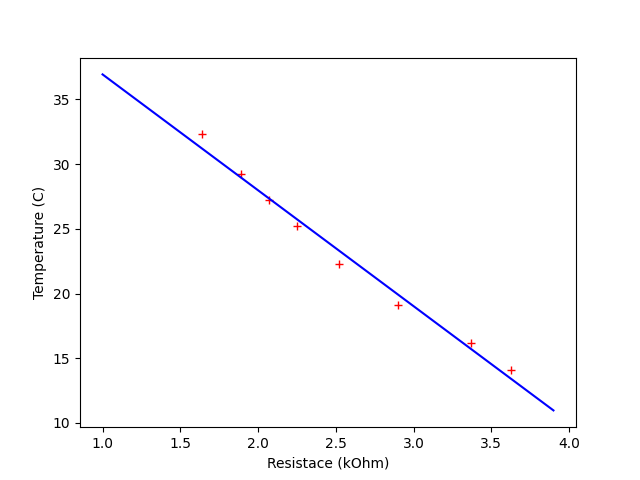

In [30]:
# converting array list into numpy array (vector)
temp_vect = np.array(temp_values)
resis_vect = np.array(resis_values)

# average for temperatures (y-dash)
temp_mean = np.mean(temp_vect)
# average for resistance (x-dash)
resis_mean = np.mean(resis_vect)

numerator = (resis_vect - resis_mean).dot(temp_vect - temp_mean)
denominator = np.sum((resis_vect - resis_mean)**2)

b = numerator/denominator
a = temp_mean - b * resis_mean

print(f"f(x) = y = {a:.3f} + {b:.3f} * x")

x_lst = np.arange(1.0,4.0,0.1)
y_lst = [a + b * x for x in x_lst]

plt.close()
plt.figure("linear regression")
plt.plot(resis_values, temp_values, '+r', label="raw data")
plt.plot(x_lst, y_lst, '-b', label="regression")
plt.xlabel("Resistace (kOhm)")
plt.ylabel("Temperature (C)")
plt.show()

In [49]:
# converting array list into numpy array (vector)
y = np.array(temp_values)
x = np.array(resis_values)

# linear function
# y = ax + b

# A - Matrix
A = np.vstack((x, np.ones(len(x)))).T
# A = np.array([x, np.ones(len(x))])).T

# vector of unknowns u = [a, b]
a, b = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)

# input list
x_lst = np.arange(1.0,4.0,0.1)
# output list 
y_lst = [b + a * x for x in x_lst]

print(f"y = {a:.3f} * x + {b:.3f}")
# square function 
# y = ax² + bx + c

# A - Matrix
A = np.vstack((x**2, x, np.ones(len(x)))).T

# vector of unknowns u = [a, b, c]
a, b, c = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
# output list
yy_lst = [c + b * x + a * x**2 for x in x_lst]

print(f"y = {a:.3f} * x² + {b:.3f} * x + c")

# cubic function 
# y = ax³ + bx² + cx + d

# A - Matrix
A = np.vstack((x**3, x**2, x, np.ones(len(x)))).T

# vector of unknowns u = [a, b, c, d]
a, b, c, d = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
# output list
yyy_lst = [d + c * x + b * x**2 + a * x**3 for x in x_lst]

print(f"y = {a:.3f} * x³ + {b:.3f} * x² + {c:.3f} * x + d")

# y = ax⁴ + bx³ + cx² + dx + e
coeffs = polyfit(x, y, n=4)
yyyy_lst = polyval(x_lst, coeffs)

y = -8.955 * x + 45.889
y = 1.912 * x² + -19.100 * x + c
y = -0.340 * x³ + 4.580 * x² + -25.814 * x + d
[ -1.45358721  14.86417179 -53.55712934  70.34905901   5.88116269]


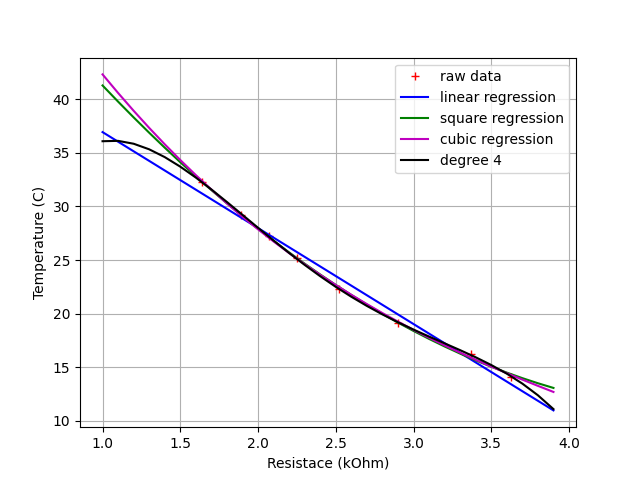

In [50]:
plt.close()
plt.figure("Regression")
plt.plot(resis_values, temp_values, '+r', label="raw data")
plt.plot(x_lst, y_lst, '-b', label="linear regression")
plt.plot(x_lst, yy_lst, '-g', label="square regression")
plt.plot(x_lst, yyy_lst, '-m', label="cubic regression")
plt.plot(x_lst, yyyy_lst, 'black', label="degree 4")
plt.xlabel("Resistace (kOhm)")
plt.ylabel("Temperature (C)")
plt.legend()
plt.grid()
plt.show()